<a href="https://colab.research.google.com/github/navgaur/Mathematical-Physics-III/blob/main/Copy_of_DE_UGCF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Differential Equations : Boundary Value problems**

- **Dirichlet Boundary Conditions**: Value of the dependent variable is defined at the boundary.
- **Neumann Boundary conditions**: Value of the derivative of the dependent variable is defined at the boundary.
- **Robin Boundary conditions**: Linear combination of variable and it's derivatives are defined at the boundary

---

## **Dirichlet Boundary Conditions**

**Example 1:**
Solve
$$ \frac{d^2x}{dt^2} = - x $$
Boundary conditions (Dirichlet BC's) : $x(0) = x_i, x(1) = x_f$

Finite differences :
$$ \frac{d^2x}{dt^2} = \frac{x_{i+1} - 2 x_i + x_{i-1}}{h^2} $$

So DE becomes:
$$ \frac{x_{i+1} - 2 x_i + x_{i-1}}{h^2} = - x_i$$

$$ x_{i-1} - (2 + h^2) x_i + x_{i+1} = 0 $$

For $i=1$:
$$ x_0 - (2 + h^2) x_1 + x_2 = 0 $$
Boundary condition $x_0 = x_i$ resulting in equation to be:
$$ - (2 + h^2) x_1 + x_2 = - x_0$$
For $i=2$:
$$ x_1 - (2 + h^2) x_2 + x_3 = 0 $$
For $i=N$:
$$ x_{N-1} - (2 + h^2) x_N + x_{N+1} = 0 $$
Boundary condition $x_{N+1} = x_f$:
$$ x_{N-1} - (2 + h^2) x_N = - x_f $$

Resulting in matrix level equation ${\bf A} y = {\bf b}$:
$${\bf A} = \begin{bmatrix}
- (2 + h^2) & 1 & 0 & ... & \\
1   & - (2 + h^2) & 0 & ... & \\
... &  & & ..& \\
0 & 0 & .. & 1 & -(2 + h^2) \\    
\end{bmatrix}, ~~~~~
{\bf b} = \begin{bmatrix}
-x_i \\
0  \\
.. \\
- x_f   
\end{bmatrix}, ~~~~~~~~~~
y =  \begin{bmatrix}
x_1 \\
x_2  \\
.. \\
x_N    
\end{bmatrix}
$$

[[-6.  1.  0.  0.]
 [ 1. -6.  1.  0.]
 [ 0.  1. -6.  1.]
 [ 0.  0.  1. -6.]] [-1.  0.  0.  0.]


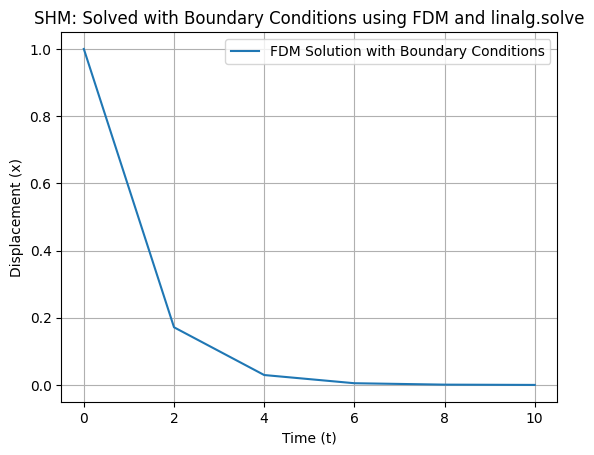

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
omega = 1.0  # Angular frequency (omega)
x0 = 1     # Boundary condition at t = 0
xf = 0   # Boundary condition at t = T
T = 10.0     # Total time
N = 4     # Number of internal grid points (excluding boundaries)
dt = T / (N + 1)  # Time step size

# Construct the tridiagonal matrix A
main_diag = -(2 + omega**2 * dt**2) * np.ones(N)    # Main diagonal
off_diag = np.ones(N-1)                             # Off-diagonals (sub/superdiagonal)

# Construct the tridiagonal matrix
A = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)

# Right-hand side vector b (boundary conditions)
b = np.zeros(N)
b[0] = -x0  # Boundary condition at t = 0 affects the first row
b[-1] = -xf # Boundary condition at t = T affects the last row

# Solve the linear system A * x = b
x_internal = np.linalg.solve(A, b)

# Include the boundary conditions to get the full solution
x = np.concatenate(([x0], x_internal, [xf]))

print(A,b)

# Time array
t = np.linspace(0, T, N + 2)

# Plot the result
plt.plot(t, x, label='FDM Solution with Boundary Conditions')
plt.xlabel('Time (t)')
plt.ylabel('Displacement (x)')
plt.title('SHM: Solved with Boundary Conditions using FDM and linalg.solve')
plt.legend()
plt.grid(True)
plt.show()


**Example 1:**
Solve
$$ \frac{d^2y}{dx^2} = - \pi^2 sin(\pi x) $$
Boundary conditions : $y(0) = 0, y(1) = 0$

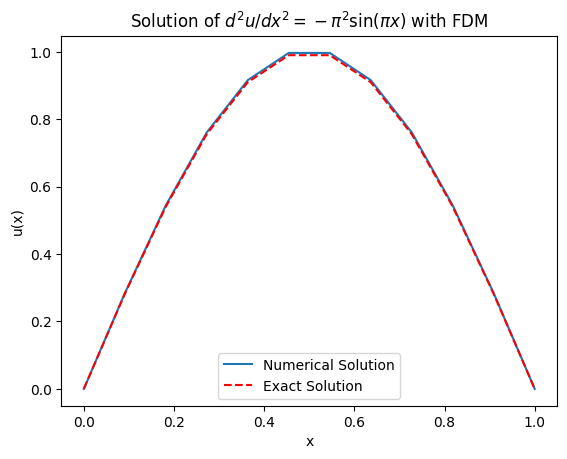

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Problem parameters
N = 10  # Number of grid points
a = 0    # Left boundary
b = 1    # Right boundary
h = (b - a) / (N + 1)  # Step size

# Define the grid points
x = np.linspace(a, b, N+2)  # Include boundary points

# Right-hand side of the differential equation (f(x) = -pi^2 * sin(pi * x))
f = -np.pi**2 * np.sin(np.pi * x[1:-1])

# Initialize the matrix A (tridiagonal matrix)
A = np.zeros((N, N))

# Fill the tridiagonal matrix A
for i in range(N):
    A[i, i] = -2 / h**2  # Diagonal elements
    if i > 0:
        A[i, i-1] = 1 / h**2  # Lower diagonal elements
    if i < N - 1:
        A[i, i+1] = 1 / h**2  # Upper diagonal elements

#print(A)

# Solve the linear system A * u = f
u = np.linalg.solve(A, f)

# Add the boundary conditions (u(0) = 0 and u(1) = 0)
u = np.concatenate(([0], u, [0]))

# Plot the solution
plt.plot(x, u, label='Numerical Solution')
plt.plot(x, np.sin(np.pi * x), 'r--', label='Exact Solution')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Solution of $d^2u/dx^2 = -\pi^2 \sin(\pi x)$ with FDM')
plt.show()


---

## **Neumann Boundary Conditions**

**Example 1:**
Solve
$$ \frac{d^2x}{dt^2} = - x $$
Boundary conditions (Neumann BC's) : $x'(0) = v_0, x'(1) = v_f$

Finite differences :
$$ \frac{d^2x}{dt^2} = \frac{x_{i+1} - 2 x_i + x_{i-1}}{h^2} $$

So DE becomes:
$$ \frac{x_{i+1} - 2 x_i + x_{i-1}}{h^2} = - x_i$$

$$ x_{i-1} + (- 2 + h^2) x_i + x_{i+1} = 0 $$

This creates a set of linear equations $A x = b$. For interior points $b = 0$

The first equation is:
$$x_2 - 2 x_1 + x_0 = 0$$

BC at $x=0$ is :
$$ \frac{x_1 - x_0}{h} = v_0$$
$$ x_0 = x_1 - v_0 h $$

Hence the first equation becomes:
$$x_2 - 2 x_1 + (x_1 - v_0 h) = 0$$
$$x_2 - x_1   = v_0 h$$  

The rest of the equations remains the same.

The last equation is
$$ x_{n-1} + (-2 + h^2) x_n + x_{n+1} = 0 $$

Similarly at $x=x_f$:
$$ \frac{x_{n+1} - x_{n}}{h} = v_f$$
$$ x_{n+1} = x_n + h v_f$$

resulting in :
$$ x_{n-1} + (-1 + h^2) x_n = - h v_f $$

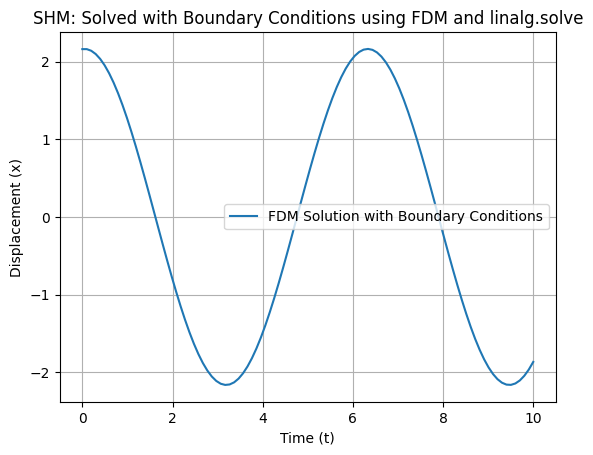

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
omega = 1.0  # Angular frequency (omega)
v0 = 0     # Boundary condition at t = 0
vf = 1   # Boundary condition at t = T
T = 10.0     # Total time
N = 100    # Number of internal grid points (excluding boundaries)
dt = T / (N + 1)  # Time step size

# Construct the tridiagonal matrix A
main_diag = (-2 + omega**2 * dt**2) * np.ones(N)    # Main diagonal
off_diag = np.ones(N-1)                             # Off-diagonals (sub/superdiagonal)

# Construct the tridiagonal matrix
A = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)

A[0,0] = (-1 + omega**2*dt**2)
A[-1,-1] = (-1 + omega**2*dt**2)

# Right-hand side vector b (boundary conditions)
b = np.zeros(N)
b[0] = v0*dt  # Boundary condition at t = 0 affects the first row
b[-1] = - vf*dt # Boundary condition at t = T affects the last row

#print(A,b)

# Solve the linear system A * x = b
x_internal = np.linalg.solve(A, b)

x0 = x_internal[0] - v0*dt
xf = x_internal[-1] + vf*dt

# Include the boundary conditions to get the full solution
x = np.concatenate(([x0], x_internal, [xf]))

# Time array
t = np.linspace(0, T, N + 2)
#print(x)

# Plot the result
plt.plot(t, x, label='FDM Solution with Boundary Conditions')
plt.xlabel('Time (t)')
plt.ylabel('Displacement (x)')
plt.title('SHM: Solved with Boundary Conditions using FDM and linalg.solve')
plt.legend()
plt.grid(True)
plt.show()


---

## **Example problems**

###**Example 1:***

Solve $$y''(x) - y (x) = 0 $$
with $y(0) = 1, y'(1) = 0$

Finite Difference equation:
$$ y_{i-1} - (2 + h^2) y_i + y_{i+1} = 0 $$

Boundary condition $y=1$ results:
$$y_0 = 1 $$

For $i=1$:
$$ - (2 + h^2) y_1 + y_2 = - 1$$

At the last point:
$$y_{n-1} - (2 + h^2) y_n + y_{n+1} = 0 $$
Boundary condition $y'(1) = 0$ means
$$\frac{y_{n+1} - y_n}{h^2} = 0$$
resulting in $y_{n+1} = y_n$ and hence equation:
$$y_{n-1} - (1 + h^2) y_n = 0 $$

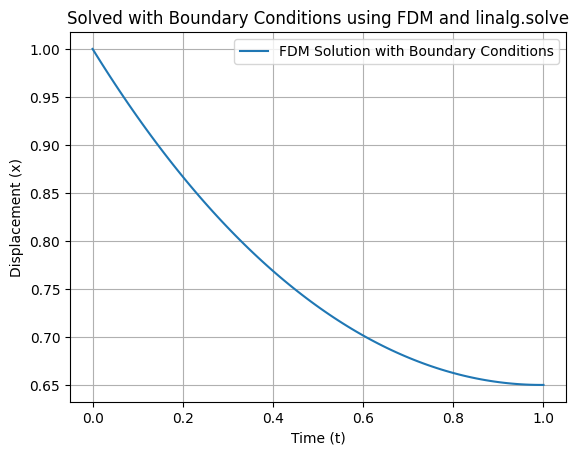

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
x0 = 1   # Boundary condition at t = 0
vf = 0   # Boundary condition at t = T
T = 1.0     # Total time
N = 100    # Number of internal grid points (excluding boundaries)
dt = T / (N + 1)  # Time step size

# Construct the tridiagonal matrix A
main_diag = - (2 + dt**2) * np.ones(N)    # Main diagonal
off_diag = np.ones(N-1)                             # Off-diagonals (sub/superdiagonal)

# Construct the tridiagonal matrix
A = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)

A[0,0] = (-2 - dt**2)
A[-1,-1] = - (1 + dt**2)

# Right-hand side vector b (boundary conditions)
b = np.zeros(N)
b[0] = - x0  # Boundary condition at t = 0 affects the first row
b[-1] = 0  # Boundary condition at t = T affects the last row

#print(A,b)

# Solve the linear system A * x = b
x_internal = np.linalg.solve(A, b)

xf = x_internal[-1]

# Include the boundary conditions to get the full solution
x = np.concatenate(([x0], x_internal, [xf]))

# Time array
t = np.linspace(0, T, N + 2)
#print(x)

# Plot the result
plt.plot(t, x, label='FDM Solution with Boundary Conditions')
plt.xlabel('Time (t)')
plt.ylabel('Displacement (x)')
plt.title('Solved with Boundary Conditions using FDM and linalg.solve')
plt.legend()
plt.grid(True)
plt.show()


---
#**Shooting Method to solve 2nd Order DE**

In this method two guess values of $y'(0)$ (initial value of the first derivative) are taken and one evaluates final value of $y$ (at the other boundary point) for both these values. One then find out the corrected value of $y'(0)$ by root finding method or by interpolation.

###**Example : Boundary value problem**

Solve $$y''(x) + g = 0 $$
with $y(0) = 1, y(10) = 50$ and $g = 9.8$.

Re-write the equations in two first order DE:
$$ \frac{d y}{dx } = z$$
$$ \frac{dz}{dx} = -g$$

Solve them for two different initial values of $y'(0) = z (0)$ named $z_1, z_2$ in below example. We improve the values of $z_1, z_2$ in below example by linear interpolation. The way to do it is

Consider two points $(z_1,w_1), (z_2, w_2)$ eqn of a line passing through them is (here independent variable is $x$ representing $z_i$ and $y$ is variable for $w_i$)
$$ \frac{y - w_2}{w_2 - w_1} = \frac{x - z_2}{z_2 - z_1}$$
Simplifying
$$x - z_2 = \frac{z_2 - z_1}{w_2 - w_1} (y - w_2)$$
$$x = z_2 + \frac{z_2 - z_1}{w_2 - w_1} (y - w_2)$$
If we assume that final value of $y = y_f = y(x_f)$ with $x_f$ being the other boundary point. Then one can improve $z_2$ by
$$z_2' = z_2 + \frac{z_2 - z_1}{w_2 - w_1} (y_f - w_2)$$
Hence the new values of $z_1, z_2$ will be
$$ z_1, z_2  = z_2, z_2 + \frac{z_2 - z_1}{w_2 - w_1} (y_f - w_2)$$


Iteration :  0 9.999999999942702 109.99999999995975
Iteration :  1 109.99999999995975 50.00000000000091
Iteration :  2 50.00000000000091 50.000000000000455


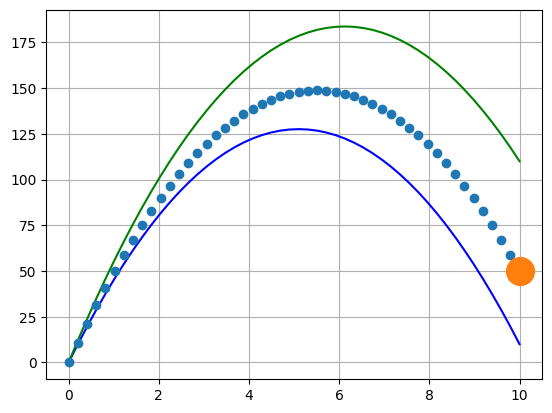

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def f(u,x):
    y, z = u
    f1, f2 = z, -9.8
    return [f1,f2]

x=np.linspace(0,10,50)
y0 = 0
y1 = 50
z1, z2 = 50, 60

u = [y0,z1]
sol = odeint(f,u,x)
w1 = sol[:,0][-1]

u1=[y0,z2]
sol1=odeint(f,u1,x)

plt.plot(x,sol[:,0],'b')
plt.plot(x,sol1[:,0],'g')

tol = 0.01

for i in range(1000):
    u = [y0, z2]
    sol = odeint(f,u,x)
    w2 = sol[:,0][-1]
    print("Iteration : ",i, w1, w2 )
    if abs(w1 - w2) < tol:
        break
    z1, z2 = z2, z2 + (z2 - z1)/(w2 - w1)*(y1 - w2)
    w1 = w2


#print(no_of_iterations)

# plotting
plt.grid()

plt.plot(x,sol[:,0],'o')
plt.plot(10,y1,marker='o',markersize=20)
plt.show()